In [1]:
import pandas as pd

data_path = "input/cat-in-the-dat/"

train = pd.read_csv(data_path + "train.csv", index_col="id")
test = pd.read_csv(data_path + "test.csv", index_col="id")
submission = pd.read_csv(data_path + "sample_submission.csv", index_col="id")

In [2]:
train.shape, test.shape

((300000, 24), (200000, 23))

In [3]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [4]:
submission.head()

,target
id,
300000,0.5
300001,0.5
300002,0.5
300003,0.5
300004,0.5


In [5]:
import scipy


def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes, columns=["dtypes"])
    summary = summary.reset_index()
    summary["Name"] = summary["index"]
    summary = summary[["Name", "dtypes"]]
    summary["Missing"] = df.isnull().sum().values
    summary["Uniques"] = df.nunique().values
    summary["First Value"] = df.loc[0].values
    summary["Second Value"] = df.loc[1].values
    summary["Third Value"] = df.loc[2].values

    for name in summary["Name"].value_counts().index:
        summary.loc[summary["Name"] == name, "Entropy"] = round(
            scipy.stats.entropy(df[name].value_counts(normalize=True), base=2), 2
        )

    return summary

In [6]:
resumetable(train)

Dataset Shape: (300000, 24)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,bin_0,int64,0,2,0,0,0,0.55
1,bin_1,int64,0,2,0,1,0,0.82
2,bin_2,int64,0,2,0,0,0,0.96
3,bin_3,object,0,2,T,T,F,1.00
4,bin_4,object,0,2,Y,Y,Y,0.94
5,nom_0,object,0,3,Green,Green,Blue,1.55
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid,2.45
7,nom_2,object,0,6,Snake,Hamster,Lion,2.44
8,nom_3,object,0,6,Finland,Russia,Russia,2.45
9,nom_4,object,0,4,Bassoon,Piano,Theremin,1.97


In [7]:
for i in range(3):
    feature = "ord_" + str(i)
    print(f"Feature: {feature} - {train[feature].unique()}")

Feature: ord_0 - [2 1 3]
Feature: ord_1 - ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
Feature: ord_2 - ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [8]:
for i in range(3, 6):
    feature = "ord_" + str(i)
    print(f"Feature: {feature} - {train[feature].unique()}")

Feature: ord_3 - ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
Feature: ord_4 - ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
Feature: ord_5 - ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'

In [9]:
print("day unique values: ", train["day"].unique())
print("month unique values: ", train["month"].unique())
print("target unique values: ", train["target"].unique())

day unique values:  [2 7 5 4 3 1 6]
month unique values:  [ 2  8  1  4 10  3  7  9 12 11  5  6]
target unique values:  [0 1]


In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

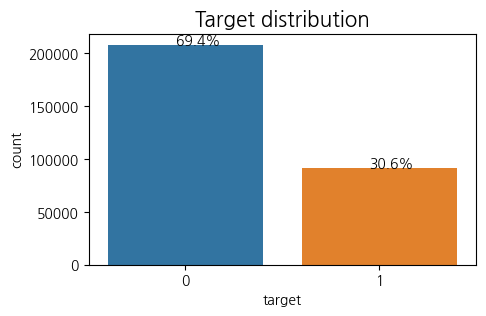

In [11]:
mpl.rc("font", family="Nanum Gothic")


def write_percent(ax, total):
    for p in ax.patches:
        percentage = "{:.1f}%".format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y))


def plot_bar(df, feature, title, figsize=(5, 3), rotation=0, hue=None):
    total = float(len(df))
    plt.figure(figsize=figsize)
    ax = sns.countplot(
        x=feature, data=df, order=df[feature].value_counts().index, hue=hue
    )
    write_percent(ax, total)
    plt.title(title, fontsize=15)
    plt.xticks(rotation=rotation)
    plt.show()


plot_bar(train, "target", "Target distribution")

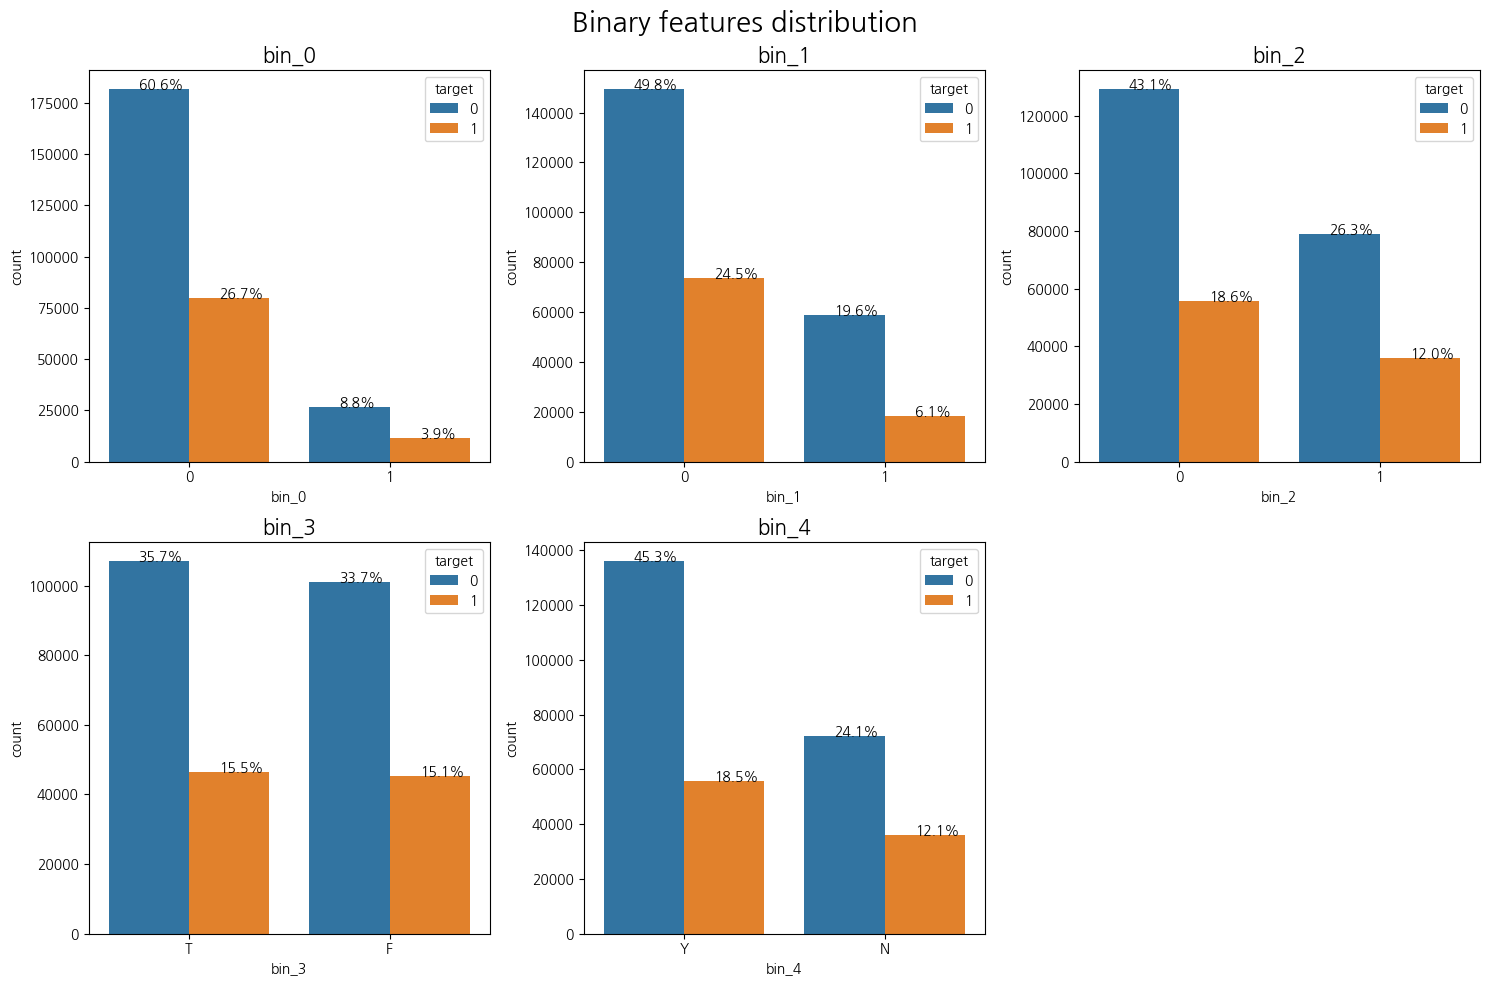

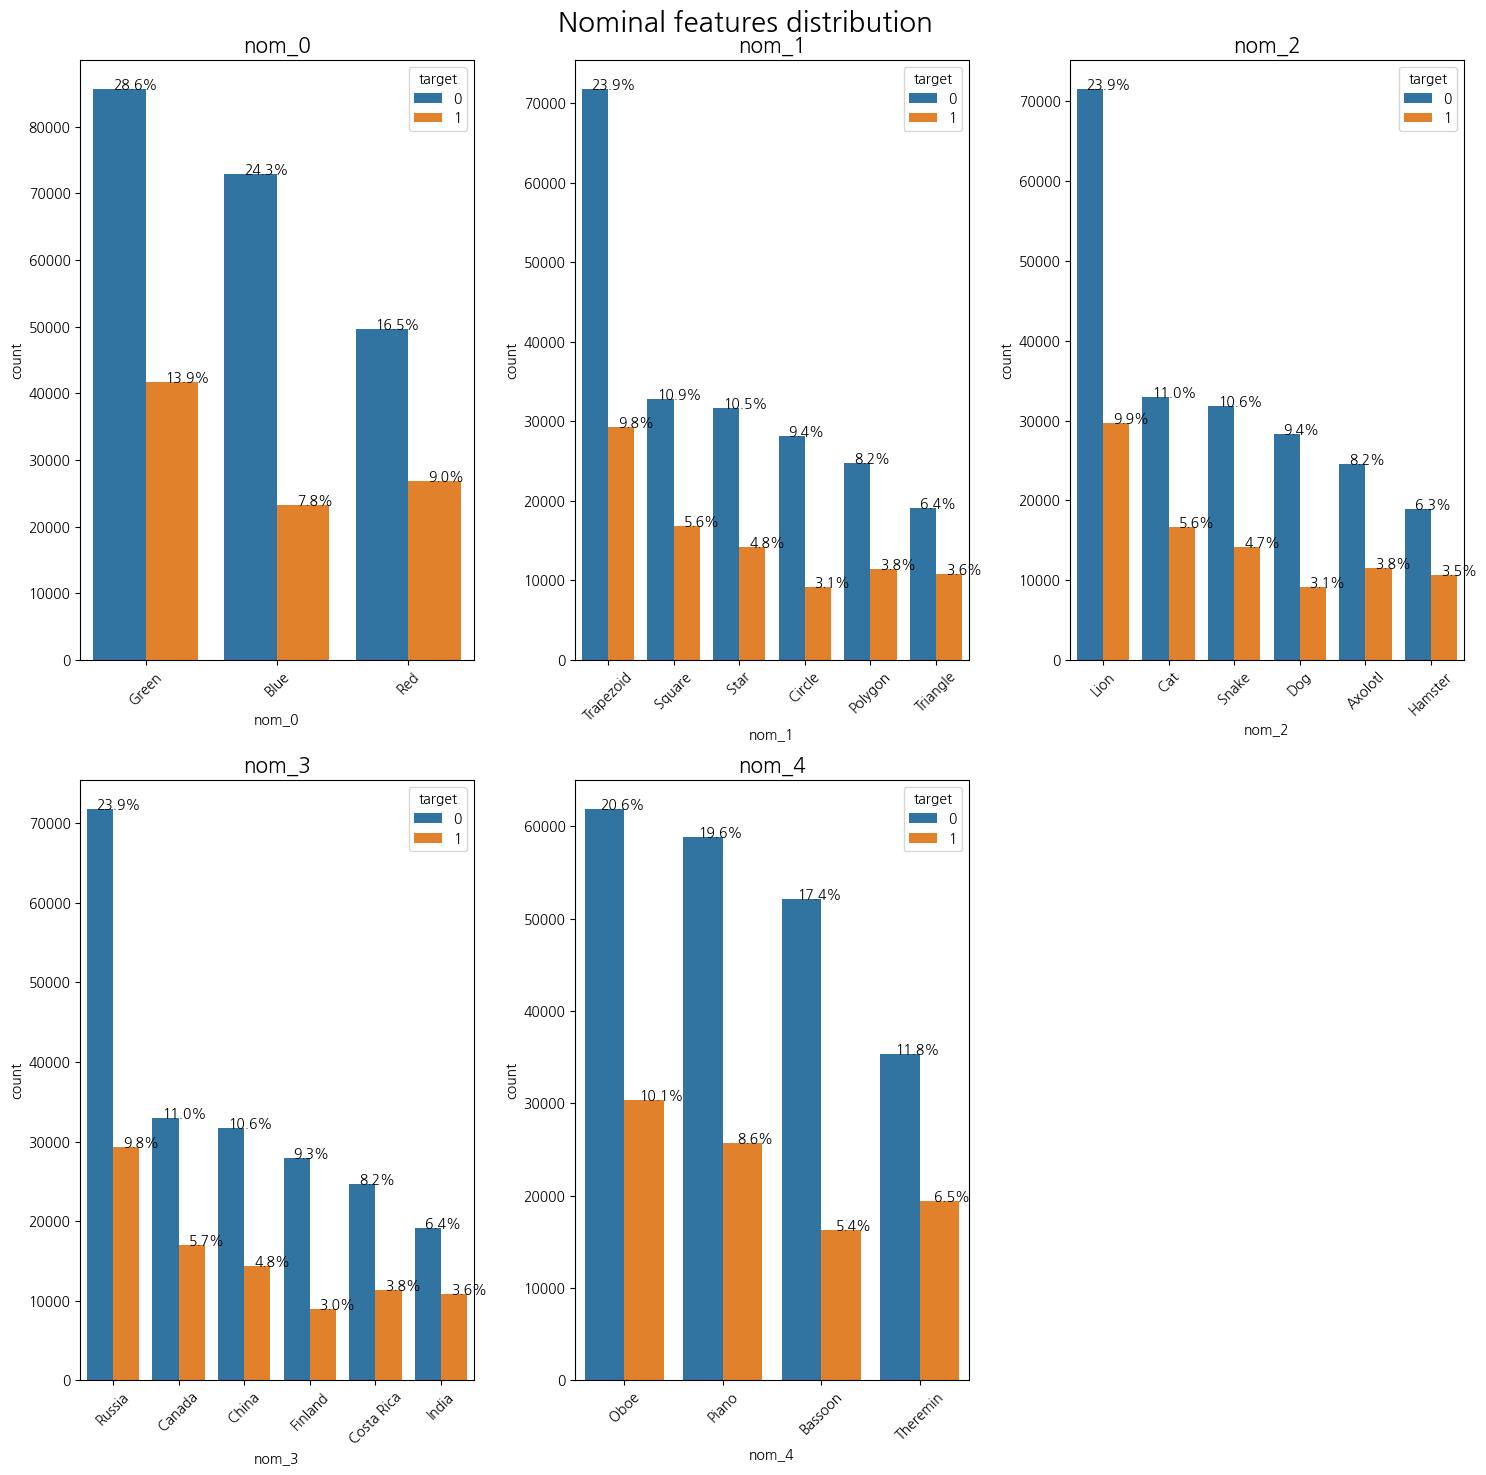

In [12]:
import matplotlib.gridspec as gridspec


def plot_bar_grid(df, features, title, figsize=(15, 10), rotation=0, hue=None):
    total = float(len(df))
    plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(2, 3)

    for i, feature in enumerate(features):
        ax = plt.subplot(gs[i])
        sns.countplot(
            x=feature, data=df, order=df[feature].value_counts().index, hue=hue
        )
        write_percent(ax, total)
        plt.title(feature, fontsize=15)
        plt.xticks(rotation=rotation)
    plt.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()


plot_bar_grid(
    train,
    ["bin_0", "bin_1", "bin_2", "bin_3", "bin_4"],
    "Binary features distribution",
    hue="target",
)
plot_bar_grid(
    train,
    ["nom_0", "nom_1", "nom_2", "nom_3", "nom_4"],
    "Nominal features distribution",
    figsize=(15, 15),
    rotation=45,
    hue="target",
)

In [13]:
crosstab = pd.crosstab(train["nom_0"], train["target"], normalize="index") * 100
crosstab = crosstab.reset_index()

In [18]:
def get_crosstab(df, feature, normalize="index"):
    crosstab = pd.crosstab(df[feature], df["target"], normalize=normalize) * 100
    crosstab = crosstab.reset_index()
    return crosstab


def plot_crosstab(df, feature, target, title, figsize=(5, 3)):
    crosstab = get_crosstab(df, feature)
    plt.figure(figsize=figsize)
    ax = sns.barplot(x=feature, y=target, data=crosstab)
    write_percent(ax, 100)
    plt.title(title, fontsize=15)
    plt.show()

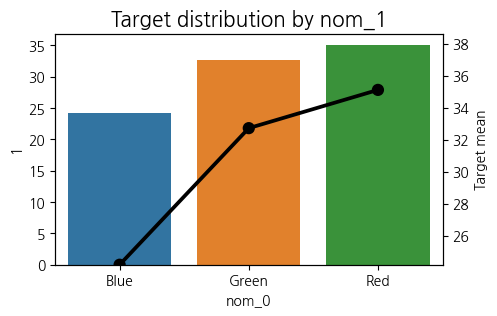

In [25]:
def plot_pointplot(df, feature, target, title, figsize=(5, 3), ax=None):
    crosstab = get_crosstab(df, feature)
    plt.figure(figsize=figsize)
    if ax is None:
        ax = sns.barplot(x=feature, y=target, data=crosstab)

    ax2 = ax.twinx()
    ax2 = sns.pointplot(
        x=feature,
        y=target,
        data=crosstab,
        order=crosstab[feature].values,
        color="black",
    )
    ax2.set_ylim(crosstab[target].min(), crosstab[target].max() * 1.1)
    ax2.set_ylabel("Target mean")

    plt.title(title, fontsize=15)


plot_pointplot(train, "nom_0", 1, "Target distribution by nom_1")

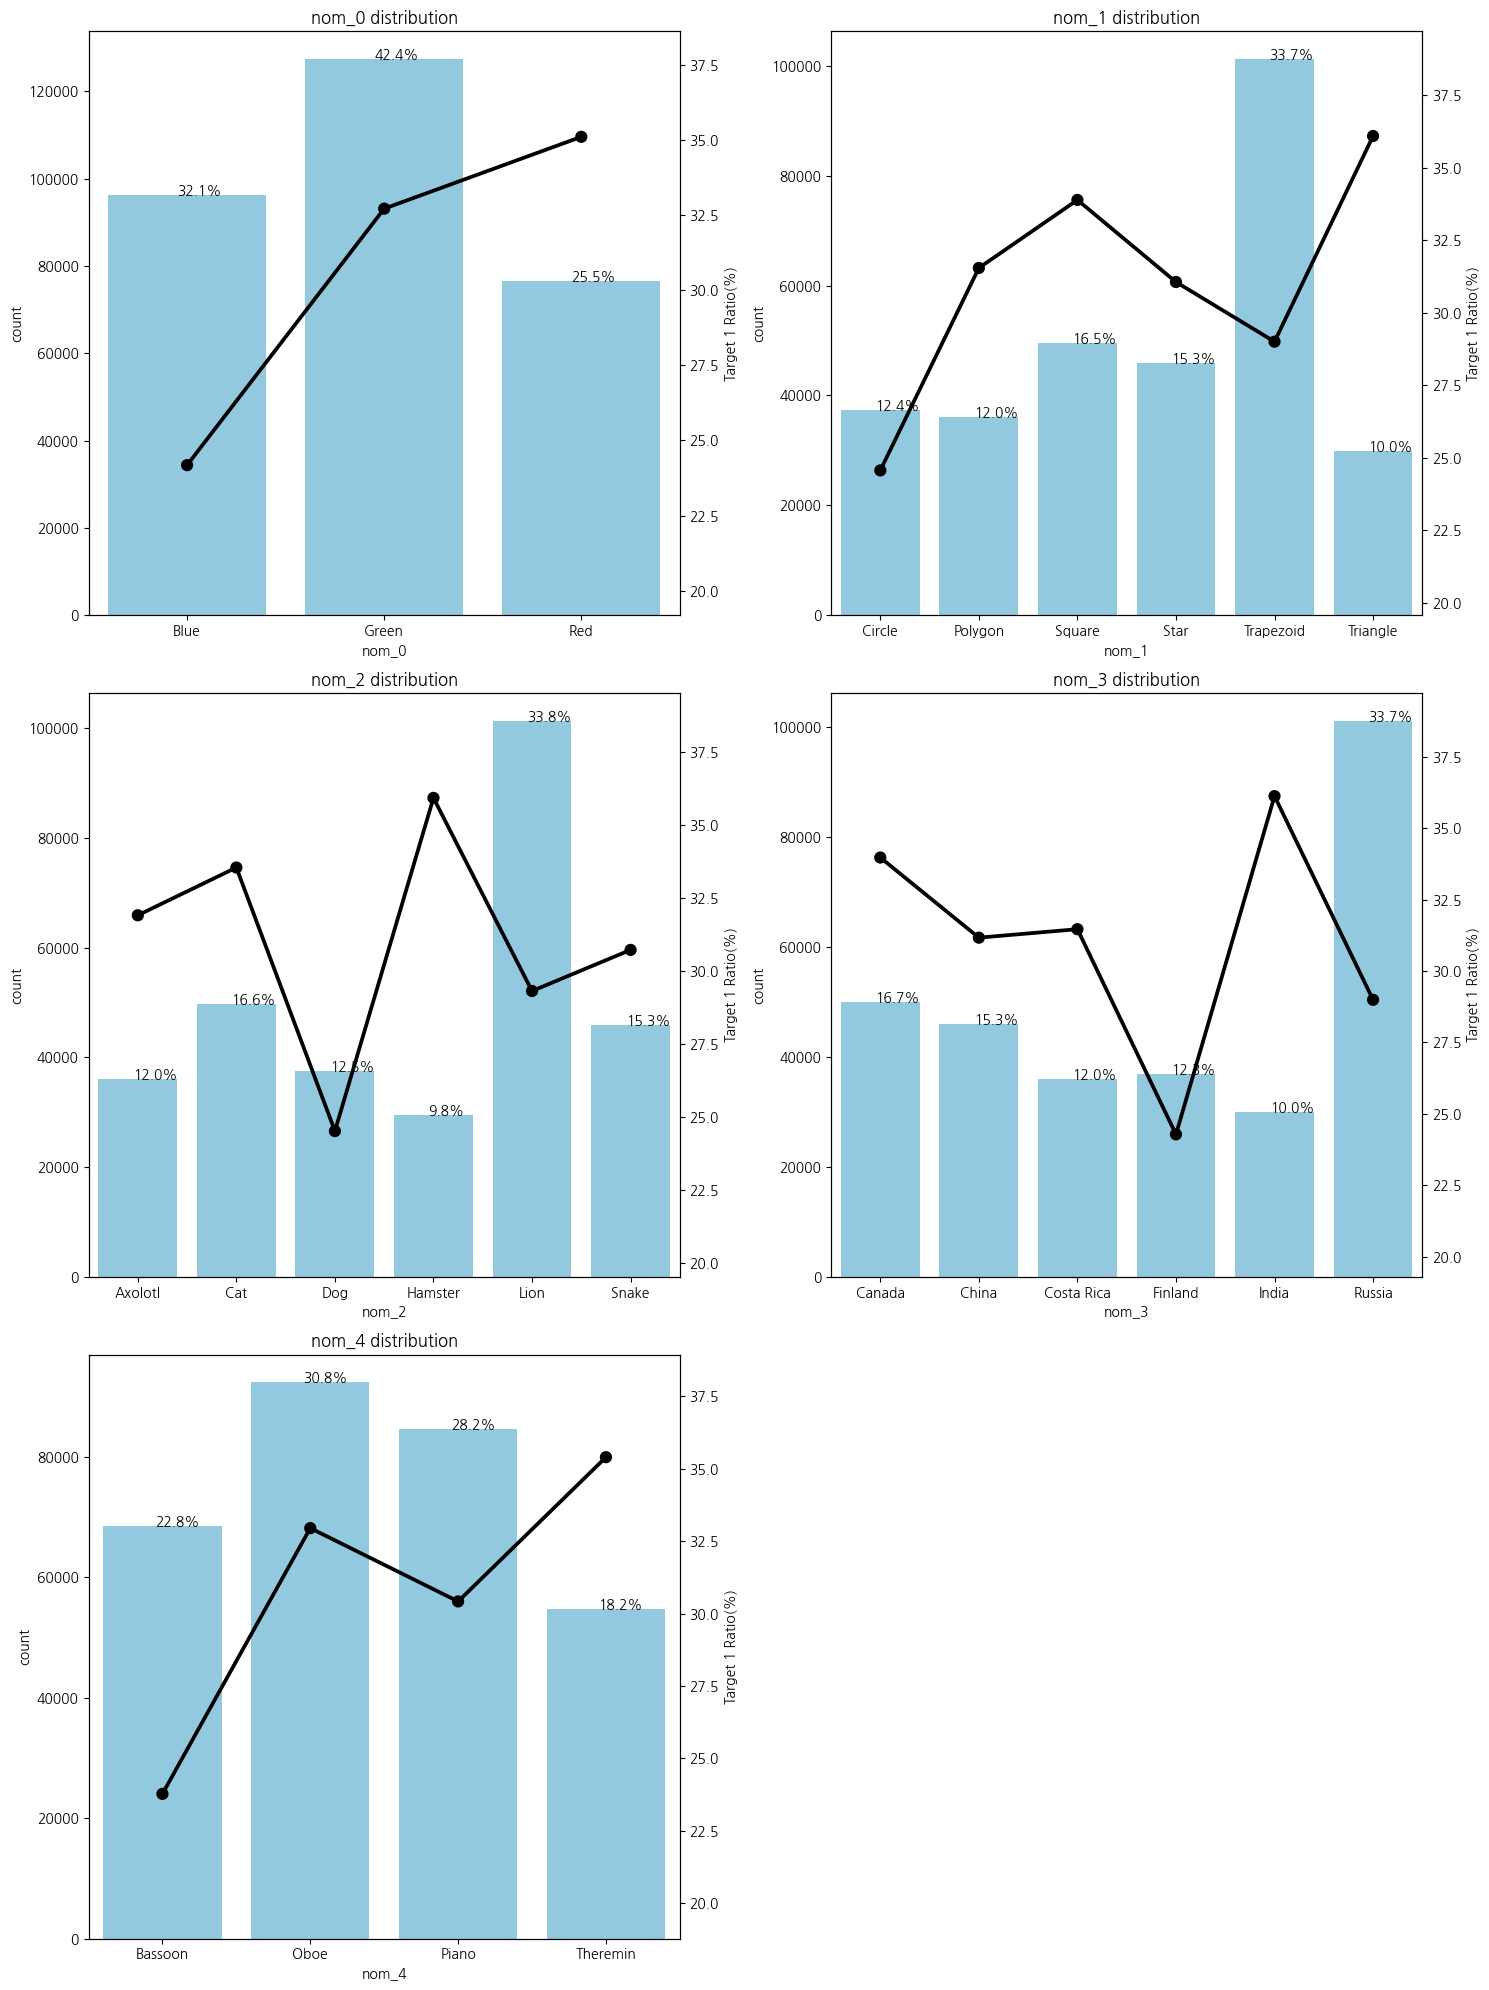

In [32]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx()
    ax2 = sns.pointplot(
        x=feature, y=1, data=crosstab, order=crosstab[feature].values, color="black"
    )
    ax2.set_ylim(crosstab[1].min() - 5, crosstab[1].max() * 1.1)
    ax2.set_ylabel("Target 1 Ratio(%)")


def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(15, 20)):
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(num_rows, num_cols)

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)
        sns.countplot(
            x=feature, data=df, order=crosstab[feature].values, color="skyblue", ax=ax
        )
        write_percent(ax, len(df))
        plot_pointplot(ax, feature, crosstab)
        ax.set_title(f"{feature} distribution")
        plt.tight_layout()


plot_cat_dist_with_true_ratio(
    train, ["nom_0", "nom_1", "nom_2", "nom_3", "nom_4"], 3, 2, size=(15, 20)
)

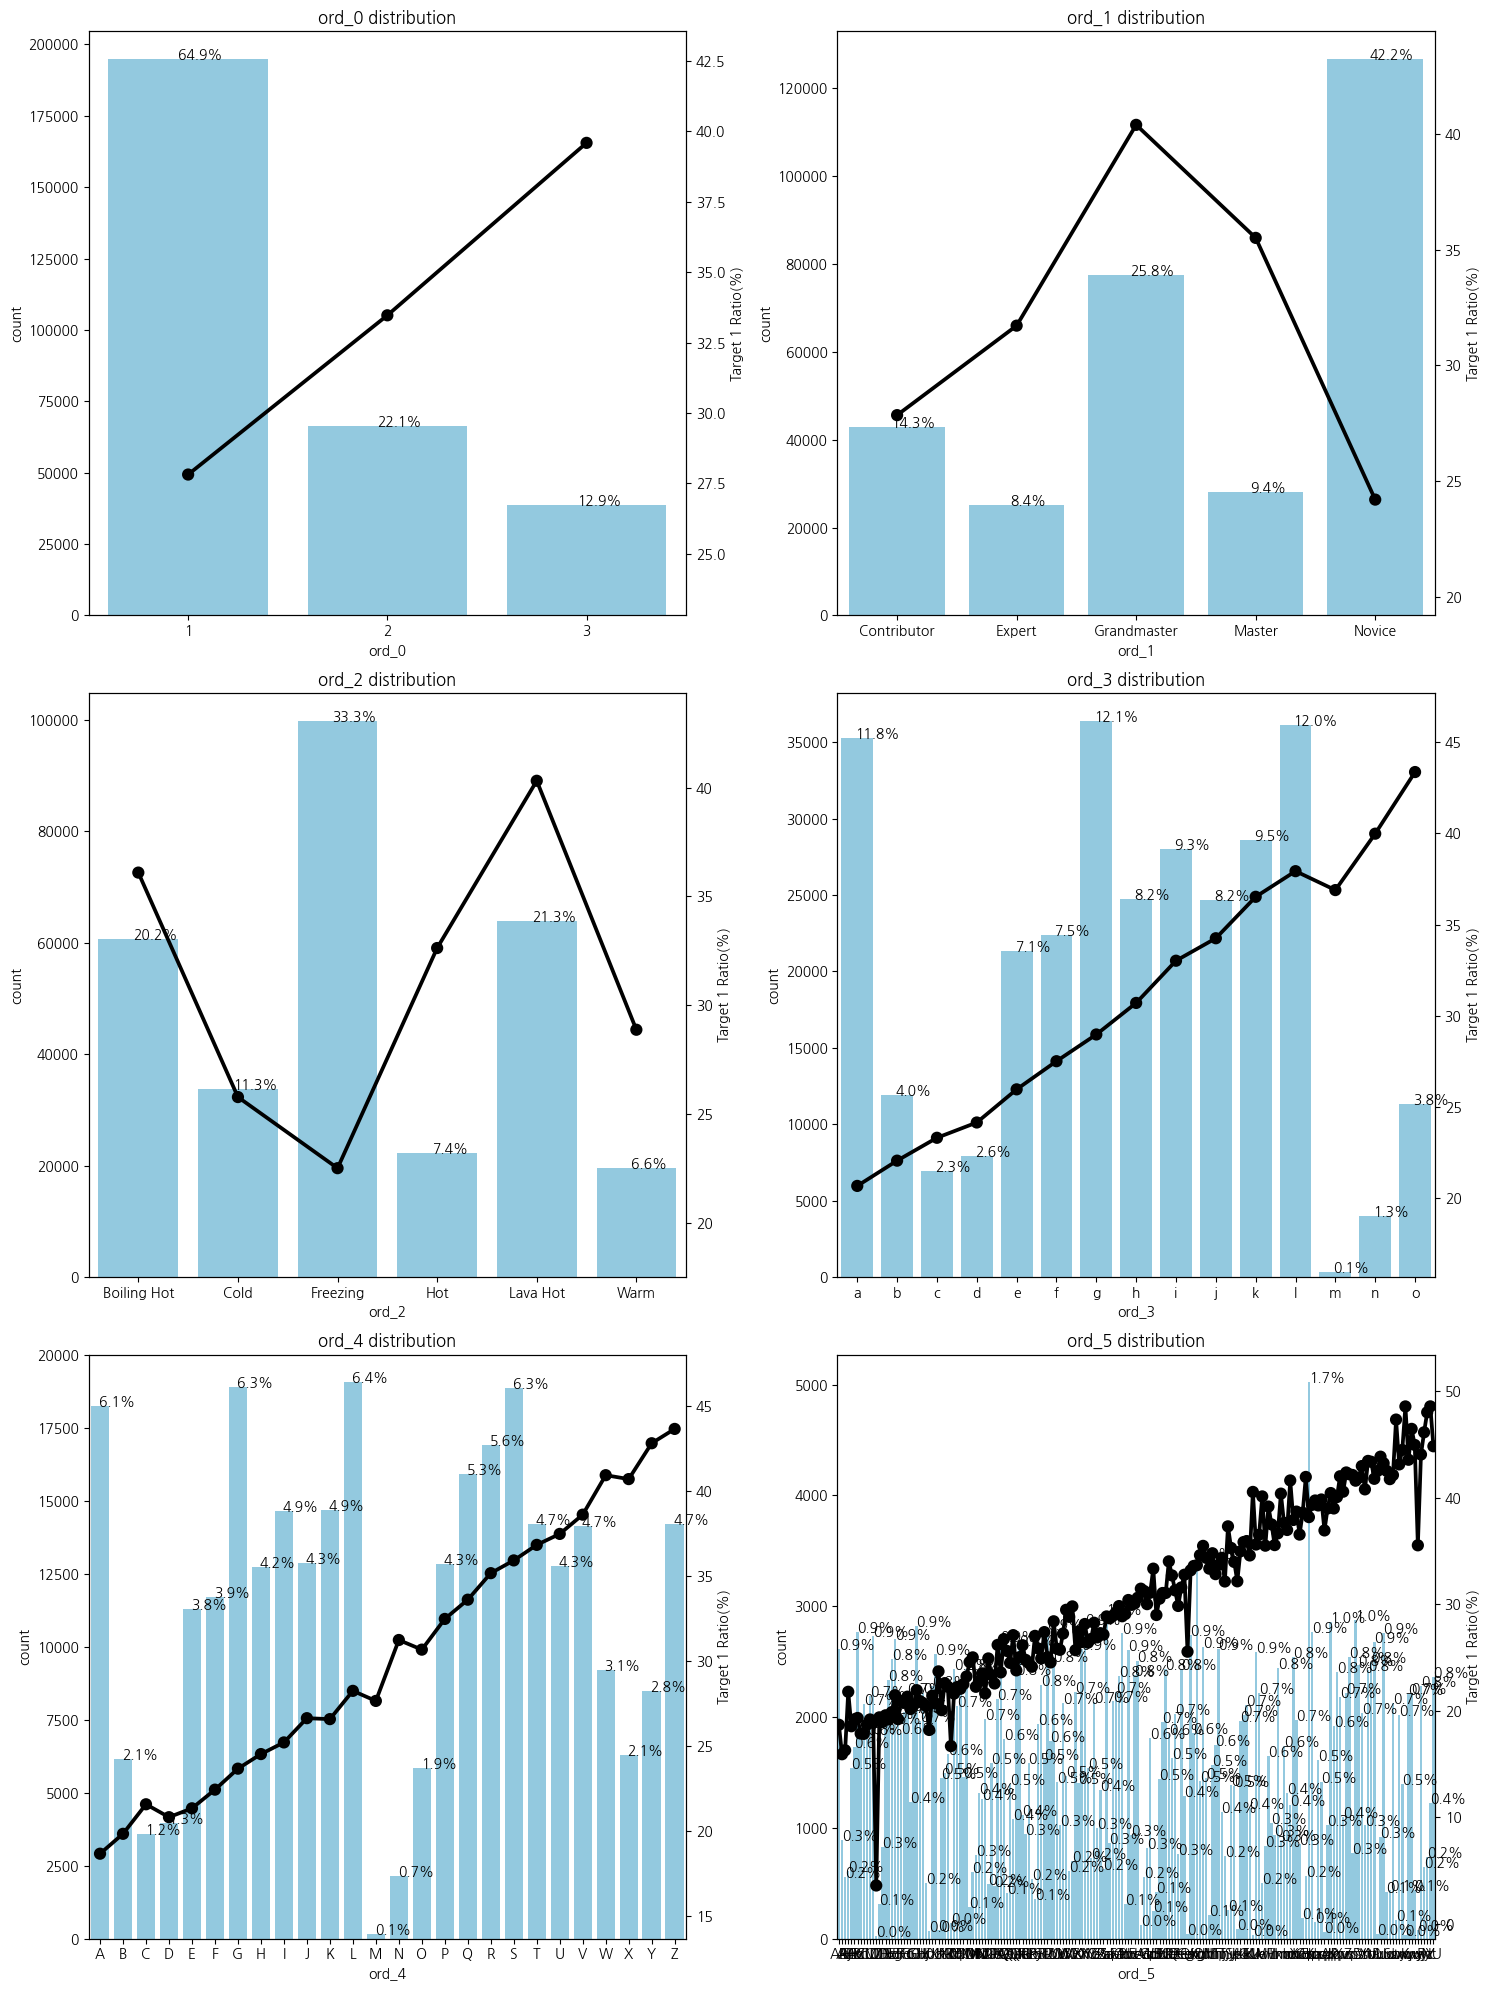

In [33]:
plot_cat_dist_with_true_ratio(
    train, ["ord_0", "ord_1", "ord_2", "ord_3", "ord_4", "ord_5"], 3, 2, size=(15, 20)
)

In [34]:
from pandas.api.types import CategoricalDtype

ord_1_value = ["Novice", "Contributor", "Expert", "Master", "Grandmaster"]
ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)

ord_2_value = ["Freezing", "Cold", "Warm", "Hot", "Boiling Hot", "Lava Hot"]
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

train["ord_1"] = train["ord_1"].astype(ord_1_dtype)
train["ord_2"] = train["ord_2"].astype(ord_2_dtype)

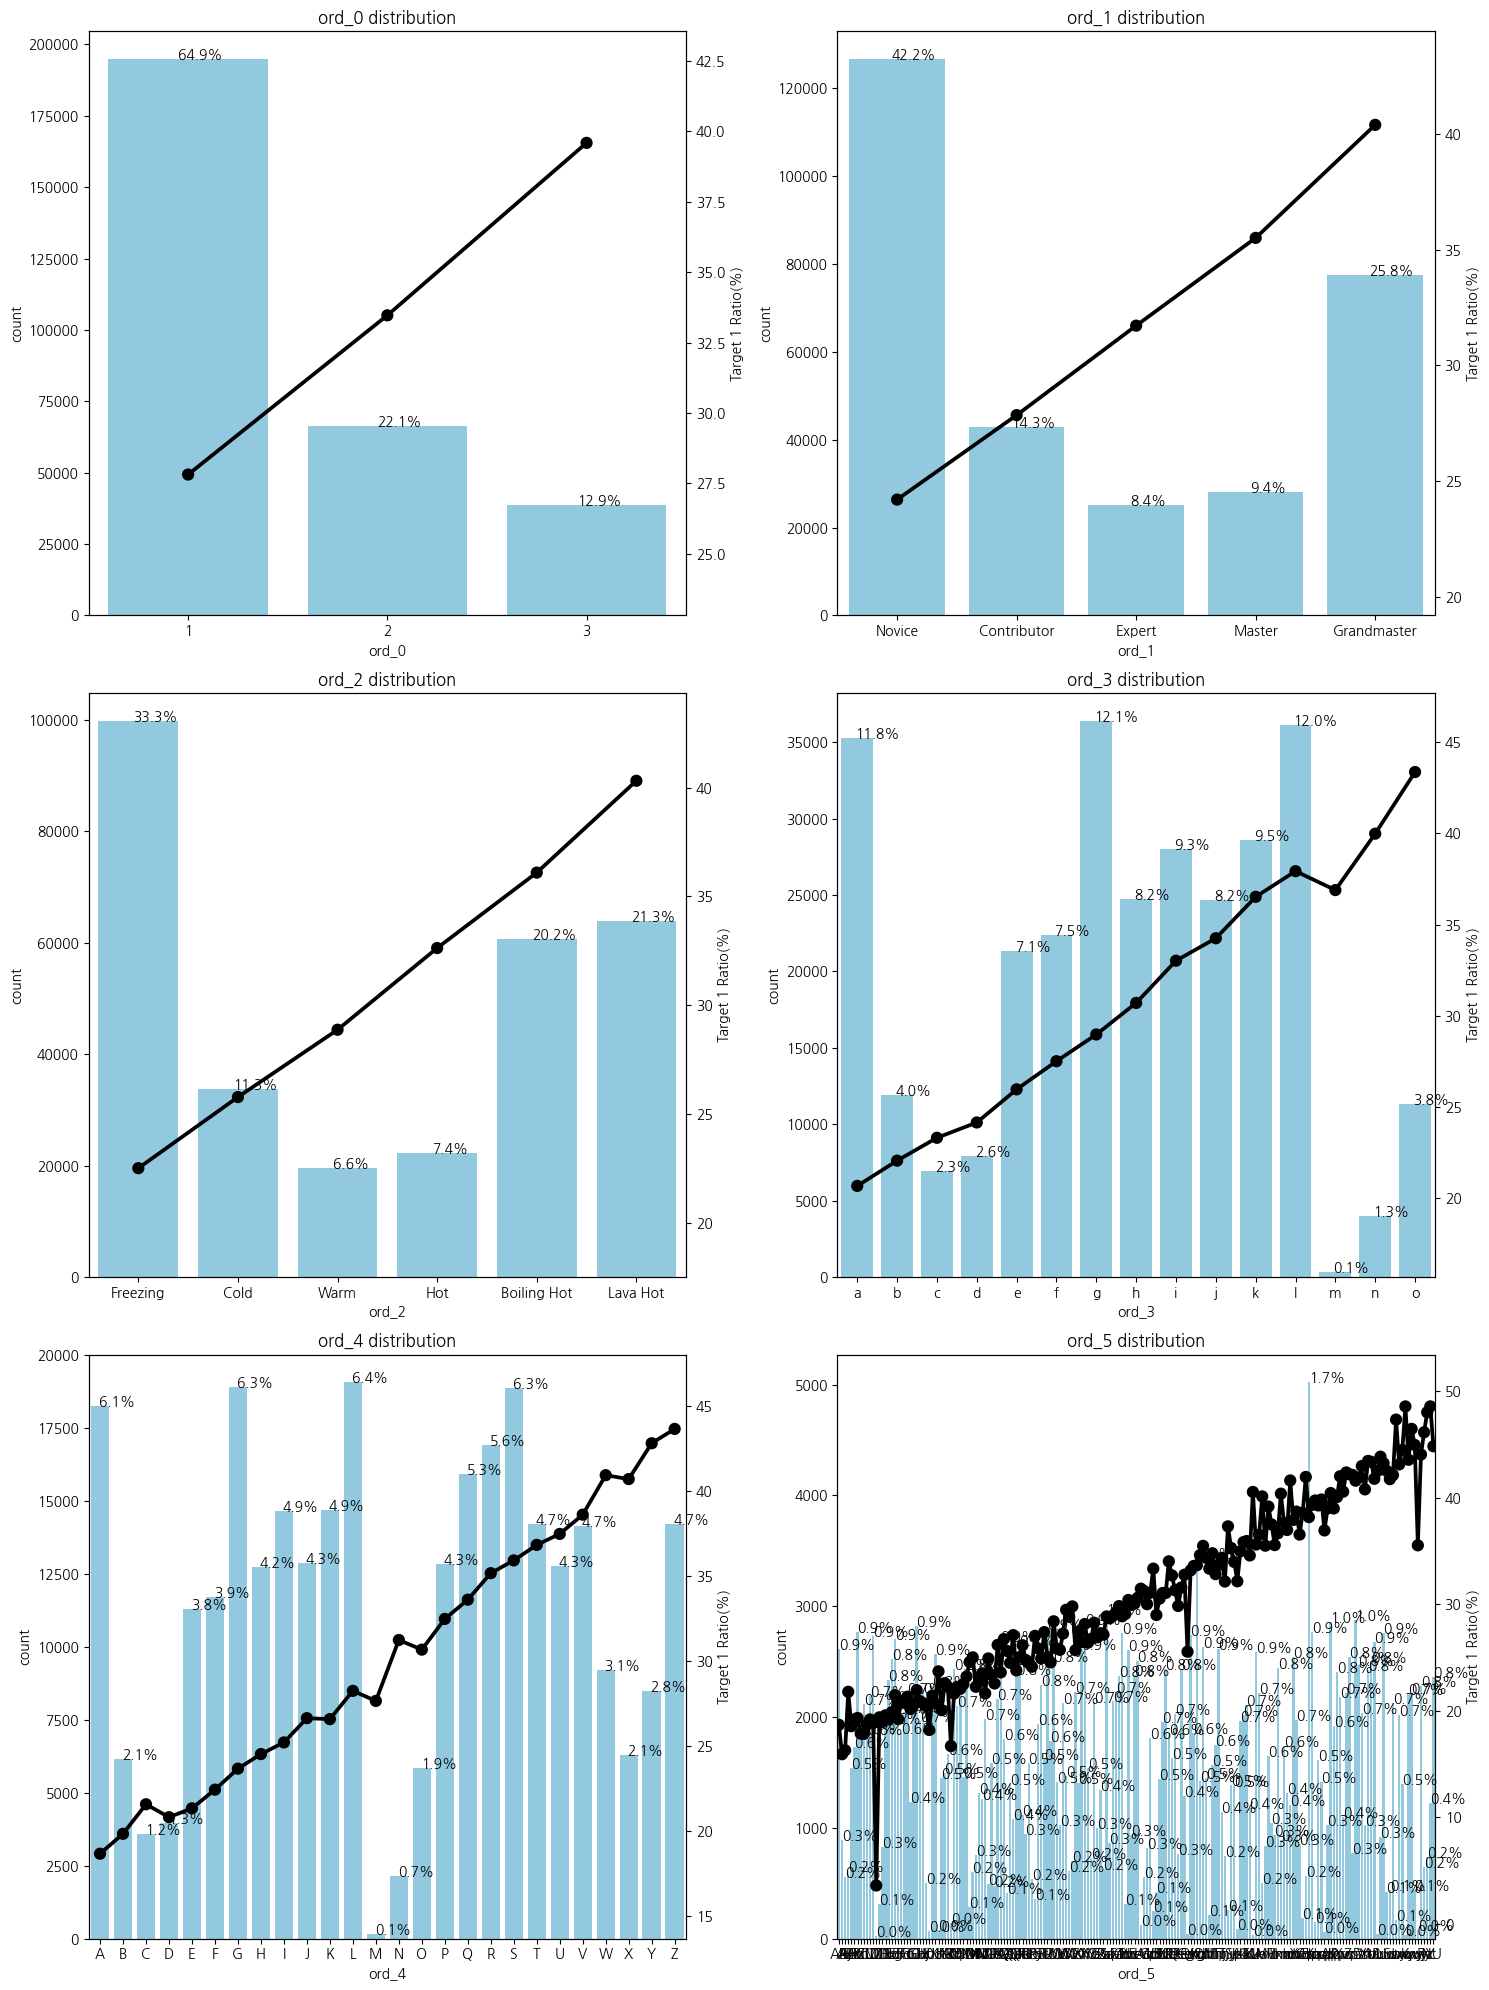

In [35]:
plot_cat_dist_with_true_ratio(
    train, ["ord_0", "ord_1", "ord_2", "ord_3", "ord_4", "ord_5"], 3, 2, size=(15, 20)
)

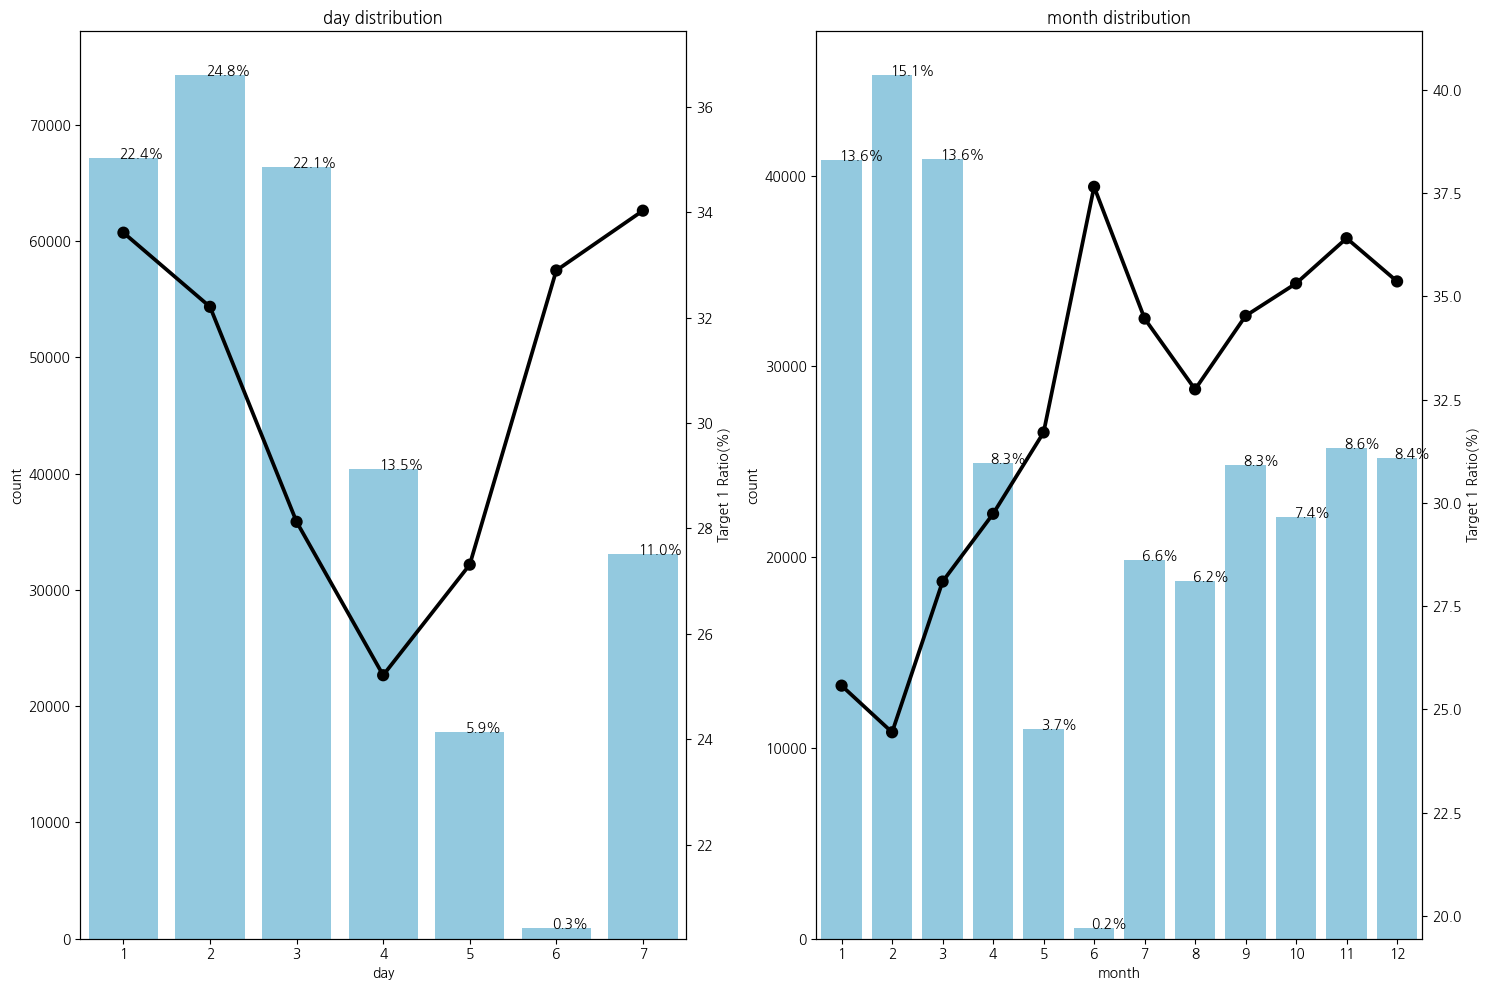

In [36]:
date_features = ["day", "month"]
plot_cat_dist_with_true_ratio(train, date_features, 1, 2, size=(15, 10))

In [38]:
# 필요한 라이브러리들을 불러옵니다.

import numpy as np
import pandas as pd
import scipy
import sklearn

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV

In [28]:
# 필요한 라이브러리들을 불러옵니다.

data_path = "input/cat-in-the-dat/"

train = pd.read_csv(data_path + "train.csv", index_col="id")
test = pd.read_csv(data_path + "test.csv", index_col="id")
submission = pd.read_csv(data_path + "sample_submission.csv", index_col="id")

In [5]:
train.columns

Index(['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
       'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0',
       'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month', 'target'],
      dtype='object')

In [6]:
# 피처(feature)들을 분류합니다. 이진형 피처, 순서형 피처, 명목형 피처, 그리고 날짜 피처로 나눕니다.

bin_features = ["bin_" + str(i) for i in range(3, 5)]  # 이진형 피처
ord_features = ["ord_" + str(i) for i in range(6)]  # 순서형 피처
nom_features = ["nom_" + str(i) for i in range(10)]  # 명목형 피처
date_features = ["day", "month"]  # 날짜 피처

In [7]:
# 훈련 데이터와 테스트 데이터를 합칩니다.

all_data = pd.concat([train.drop("target", axis=1), test])
y_train = train["target"]

In [8]:
# 이진형 피처를 정수로 매핑합니다.

all_data["bin_3"] = all_data["bin_3"].map({"F": 0, "T": 1})
all_data["bin_4"] = all_data["bin_4"].map({"N": 0, "Y": 1})

In [10]:
# 불필요한 피처를 삭제합니다.

all_data.drop("bin_0", inplace=True, axis=1)

In [11]:
ord1dict = {"Novice": 0, "Contributor": 1, "Expert": 2, "Master": 3, "Grandmaster": 4}
ord2dict = {
    "Freezing": 0,
    "Cold": 1,
    "Warm": 2,
    "Hot": 3,
    "Boiling Hot": 4,
    "Lava Hot": 5,
}

all_data["ord_1"] = all_data["ord_1"].map(ord1dict)
all_data["ord_2"] = all_data["ord_2"].map(ord2dict)

In [12]:
ord_encoder = OrdinalEncoder(categories="auto")  # OrdinalEncoder 객체 생성
all_data[ord_features[3:]] = ord_encoder.fit_transform(all_data[ord_features[3:]])

all_data[ord_features[3:]]

,ord_3,ord_4,ord_5
id,,,
0,7.0,3.0,136.0
1,0.0,0.0,93.0
2,7.0,17.0,31.0
3,8.0,3.0,134.0
4,0.0,17.0,158.0
...,...,...,...
499995,9.0,0.0,25.0
499996,5.0,18.0,17.0
499997,6.0,21.0,66.0


In [13]:
all_data[ord_features] = StandardScaler().fit_transform(all_data[ord_features])
all_data[ord_features]

,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
id,,,,,,
0,0.731992,1.416421,-0.660160,0.100961,-1.338303,0.757446
1,-0.672627,1.416421,0.324194,-1.726851,-1.748107,-0.018723
2,-0.672627,0.224377,1.308547,0.100961,0.574119,-1.137850
3,-0.672627,1.416421,0.816371,0.362077,-1.338303,0.721345
4,-0.672627,1.416421,-1.152336,-1.726851,0.574119,1.154555
...,...,...,...,...,...,...
499995,-0.672627,-0.967667,1.308547,0.623193,-1.748107,-1.246153
499996,-0.672627,-0.371645,1.308547,-0.421271,0.710720,-1.390556
499997,-0.672627,-0.967667,0.816371,-0.160155,1.120525,-0.506085


In [14]:
all_data[nom_features[5:]].nunique()

nom_5      222
nom_6      522
nom_7     1220
nom_8     2219
nom_9    12068
dtype: int64

In [16]:
all_data["nom_5"] = all_data["nom_5"].str[4:]
all_data["nom_6"] = all_data["nom_6"].str[3:]
all_data["nom_7"] = all_data["nom_7"].str[3:]
all_data["nom_8"] = all_data["nom_8"].str[3:]
all_data["nom_9"] = all_data["nom_9"].str[3:]

In [17]:
all_data[nom_features[5:]].nunique()

nom_5      222
nom_6      522
nom_7     1220
nom_8     2218
nom_9    12064
dtype: int64

In [18]:
onehot_encoder = OneHotEncoder(categories="auto", dtype="float64", drop="first")
nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])
all_data.drop(nom_features, inplace=True, axis=1)

In [19]:
onehot_encoder = OneHotEncoder(categories="auto", dtype="float64", drop="first")
dm_matrix = onehot_encoder.fit_transform(all_data[date_features])
all_data.drop(date_features, inplace=True, axis=1)

In [21]:
# 희소 행렬(sparse matrix)을 수평으로 연결(hstack)한 후, Compressed Sparse Row (CSR) 형식으로 변환합니다.

all_data_sprs = scipy.sparse.hstack(
    [nom_matrix, scipy.sparse.coo_matrix(all_data).astype("float64"), dm_matrix]
).tocsr()
display(all_data_sprs)

<500000x16288 sparse matrix of type '<class 'numpy.float64'>'
	with 9235121 stored elements in Compressed Sparse Row format>

In [22]:
X_train = all_data_sprs[: y_train.shape[0]]
X_test = all_data_sprs[y_train.shape[0] :]

In [23]:
C = 0.12

clf = LogisticRegression(C=C, solver="lbfgs", max_iter=1000, verbose=0, n_jobs=-1)

score = cross_validate(clf, X_train, y_train, cv=3, scoring="roc_auc")
mean = score["test_score"].mean()
print(score["test_score"])
print("C =", C, f"{mean:.8f}")

[0.80053182 0.80490895 0.80245839]
C = 0.12 0.80263305
CPU times: total: 172 ms
Wall time: 14.7 s


In [39]:
logistic_model = LogisticRegression()

param_dist = {'C': np.logspace(-3, 2, 100)}
random_search = RandomizedSearchCV(LogisticRegression(solver='lbfgs', max_iter=1000, verbose=0, n_jobs=-1), param_distributions=param_dist, n_iter=10, cv=3, scoring="roc_auc", random_state=42)
random_search.fit(X_train, y_train)
best_C = random_search.best_params_["C"]

# 최적의 C 값을 사용하여 cross_validate를 사용해 모델 성능 평가하기
clf = LogisticRegression(C=best_C, solver="lbfgs", max_iter=1000, verbose=0, n_jobs=-1)
score = cross_validate(clf, X_train, y_train, cv=5, scoring="roc_auc")

In [43]:
random_search.best_params_["C"]


0.093260334688322

In [40]:
clf = LogisticRegression(C=C, solver="lbfgs", max_iter=1000, verbose=0, n_jobs=-1)
clf.fit(X_train, y_train)

LogisticRegression(C=0.12, max_iter=1000, n_jobs=-1)

In [41]:
y_preds = clf.predict_proba(X_test)[:, 1]

In [42]:
submission["target"] = y_preds
submission.to_csv("output\ch07\submission03.csv")